Let us contemplate a situation wherein we own ownership of shares in the `Coca-Cola Company (NYSE: KO)` and have a profound inclination towards scrutinizing its financial performance with regards to returns. Let us now hypothesize that there are other factors that provide valuable perspectives on the returns of KO. The aim of this study is to examine the relationship between the stock returns (Y) and many other factors. Potential options for study may include the `performance of SPY,` a widely used ticker symbol representing the SPDR S&P 500 ETF, `the performance of PepsiCo (NASDAQ: PEP),` a notable contender within the market, and `the performance of the US Dollar index (ICE: DX).` The variables in question are denoted by the symbol X and are allocated subscripts to facilitate individual identification.

Let's put them all in an equation format to make things explicit:

$$\ Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \beta_3 X_{i,3} + \epsilon_i \$$

$$ β_0, β_1, β_2, β_3  - model parameters. $$

Here, we have multiple linear regression model to describe the relation between Y (the returns on KO) and X(i), where i = 1,2,3 (the returns on SPY, PEP, and DX respectively). 

- The SPDR S&P 500 ETF, commonly referred to by its ticker symbol "SPY," is an exchange-traded fund (ETF) that tracks the S&P 500 Index. The idea is to check whether there is any relationship between SPY and KO or the returns on SPY (which represents the SPDR S&P 500 ETF, a proxy for the broader U.S. stock market) can affect the return on KO (Coca-Cola). 

- The U.S. Dollar Index (USDX, DXY, DX, or ICE: DX) is an index (or measure) that represents the value of the U.S. dollar relative to a basket of six major world currencies. It provides a general indication of the international value of the U.S. dollar. The index is traded as a futures contract on the Intercontinental Exchange (ICE). The idea is to check whether the returns on the U.S. Dollar Index (DX) can influence the returns on KO. 

- Coca-Cola (KO) and PepsiCo (PEP) are two of the most prominent players in the beverage industry and have been direct competitors for over a century. Because they operate in the same industry and often target the same customer base, the returns of one company could be influenced by the performance of the other.


## Importing the required libraries

In [43]:
### Import the required libraries

import numpy as np
import pandas as pd

import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## To use statsmodels for linear regression
import statsmodels.formula.api as smf

## To use sklearn for linear regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [44]:
# Import warnings to suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
## Fetch data from yfinance
## 3-year daily data for Coca-Cola, SPY, Pepsi, and USD index

end1 = datetime.date(2021, 7, 28)
start1 = end1 - pd.Timedelta(days = 365 * 3)

ko_df = yf.download("KO", start = start1, end = end1, progress = False)
spy_df = yf.download("SPY", start = start1, end = end1, progress = False)
pep_df = yf.download("PEP", start = start1, end = end1, progress = False)
usdx_df = yf.download("DX-Y.NYB", start = start1, end = end1, progress = False)

####################################################
## Calculate log returns for the period based on Adj Close prices

ko_df['ko'] = np.log(ko_df['Adj Close'] / ko_df['Adj Close'].shift(1))
spy_df['spy'] = np.log(spy_df['Adj Close'] / spy_df['Adj Close'].shift(1))
pep_df['pep'] = np.log(pep_df['Adj Close'] / pep_df['Adj Close'].shift(1))
usdx_df['usdx'] = np.log(usdx_df['Adj Close'] / usdx_df['Adj Close'].shift(1))


The "Adjusted Close" price for a stock reflects the stock's closing price on any given day but takes into account factors such as dividends, stock splits, and new stock offerings. It provides a more accurate reflection of a stock's value over time, compared to the regular closing price. Let's delve into its importance:

1. **Dividends**: When a company pays dividends to its shareholders, the stock price typically decreases by roughly the amount of the dividend on the ex-dividend date. The adjusted close price will account for this decrease, providing continuity in the stock's price history.

2. **Stock Splits**: If a company undergoes a stock split or a reverse stock split, the number of shares outstanding and the price of each share will change. The adjusted close price will modify historical prices to reflect this change, ensuring that the historical data remains consistent.

3. **Rights Offerings**: Sometimes, companies might offer existing shareholders the right to buy additional shares at a discounted price (usually below market price). This can affect the stock's price. Adjusted close prices account for such events.

4. **Other Corporate Actions**: There might be other corporate actions like spin-offs, which can impact a stock's price. The adjusted close will reflect these changes to provide an accurate historical perspective.

**Why is Adjusted Close Important?**:

1. **Historical Analysis**: For investors looking at long-term trends, the adjusted close gives a more accurate picture of a stock's historical performance.

2. **Return Calculations**: Using the adjusted close is crucial when calculating returns over a period, especially for dividend-paying stocks. If dividends aren't reinvested or accounted for, the returns could be significantly understated.

3. **Comparative Analysis**: When comparing the performance of two or more stocks or a stock to an index, using the adjusted close ensures the comparison takes into account all capital changes and not just the price movements.

The above code calculates the <b>daily log returns<b> of different assets (KO, SPY, PEP, USDX) using the adjusted close prices. By using the adjusted close, these log returns account for dividends, stock splits, and other corporate actions, providing a more accurate measure of daily returns. Log returns are often preferred in financial analyses due to their time-additive properties, meaning that multiple log returns can be summed to get the return over a period.

<b>Log returns</b>, also known as continuously compounded returns, are calculated using the natural logarithm of the ratio of consecutive prices. The formula for calculating log return for a particular period is:
$$
\ r_t = \ln \left( \frac{P_t}{P_{t-1}} \right) \
$$

Where:
- \( r_t \) is the log return at time \( t \)
- \( P_t \) is the price of the asset at time \( t \)
- \( P_{t-1} \) is the price of the asset at time \( t-1 \)

Here's why log returns are important and preferred in many financial analyses:

1. **Time Additivity**: Unlike simple returns, log returns are time-additive. This means that if you want to find the cumulative return over multiple periods, you can simply sum up the log returns of each period. With simple returns, you'd need to compound them.

2. **Statistical Properties**: Log returns are approximately normally distributed for many assets, especially when considering short intervals. This makes them more amenable to various statistical and mathematical analyses.

3. **Small Differences for Small Returns**: For small return values, the difference between log returns and simple returns becomes negligible. This makes log returns a good approximation for simple returns when returns are small.

4. **Multiplicative Factors**: Log returns transform the multiplicative factors in price series to additive factors in return series. This makes certain mathematical operations more straightforward.

5. **Compounding Effect**: Log returns inherently account for the compounding effect, which becomes particularly important in analyses over longer periods.

6. **Stability in Time Series Analysis**: In time series analysis, log returns often demonstrate more stable properties (like volatility) over time compared to simple returns. This can be crucial for models that assume constant variance, such as ARCH and GARCH models.

7. **Ease in Differential Analysis**: When working with stochastic calculus and differential equations in the context of finance, like in the Black-Scholes model for option pricing, the mathematics becomes more tractable using log returns.

In summary, while both simple and log returns provide insights into the performance of investments, log returns offer several mathematical and statistical advantages that make them preferable in various financial and econometric analyses.

### Checking the DataFrames

In [46]:
ko_df.head()

,Open,High,Low,Close,Adj Close,Volume,ko
Date,,,,,,,
2018-07-30,46.099998,46.439999,46.049999,46.230000,39.217121,8967900,NaN
2018-07-31,46.400002,46.669998,46.310001,46.630001,39.556435,12438800,0.008615
2018-08-01,46.450001,46.490002,46.169998,46.389999,39.352848,9904100,-0.005160
2018-08-02,46.480000,46.630001,46.180000,46.180000,39.174706,12009700,-0.004537
2018-08-03,46.230000,46.759998,46.139999,46.619999,39.547958,11462800,0.009483


In [47]:
spy_df.head()

,Open,High,Low,Close,Adj Close,Volume,spy
Date,,,,,,,
2018-07-30,281.510010,281.690002,279.359985,279.950012,256.374023,63742500,NaN
2018-07-31,280.809998,282.019989,280.380005,281.329987,257.637787,68570500,0.004917
2018-08-01,281.559998,282.130005,280.130005,280.859985,257.207397,53853300,-0.001672
2018-08-02,279.390015,282.579987,279.160004,282.390015,258.608551,63426400,0.005433
2018-08-03,282.529999,283.660004,282.329987,283.600006,259.716644,53935400,0.004276


In [48]:
pep_df.head()

,Open,High,Low,Close,Adj Close,Volume,pep
Date,,,,,,,
2018-07-30,113.779999,114.589996,113.669998,114.180000,98.273911,3621800,NaN
2018-07-31,114.660004,115.489998,114.110001,115.000000,98.979698,4892100,0.007156
2018-08-01,114.419998,114.529999,113.230003,113.610001,97.783333,4169000,-0.012161
2018-08-02,113.599998,114.930000,113.089996,114.690002,98.712883,4167200,0.009461
2018-08-03,114.769997,116.699997,114.370003,116.300003,100.098579,3934500,0.013940


In [49]:
usdx_df.head()

,Open,High,Low,Close,Adj Close,Volume,usdx
Date,,,,,,,
2018-07-30,94.660004,94.760002,94.260002,94.360001,94.360001,0,NaN
2018-07-31,94.330002,94.570000,94.160004,94.489998,94.489998,0,0.001377
2018-08-01,94.559998,94.709999,94.489998,94.620003,94.620003,0,0.001375
2018-08-02,94.629997,95.190002,94.610001,95.169998,95.169998,0,0.005796
2018-08-03,95.180000,95.370003,94.980003,95.139999,95.139999,0,-0.000315


#### Create a dataframe with log returns of X's (spy, pep, usdx) and Y (KO)


In [50]:
## Create a dataframe with log returns of X's (spy, pep, usdx) and Y (ko)

df = pd.concat([spy_df['spy'], ko_df['ko'], pep_df['pep'], usdx_df['usdx']], axis = 1).dropna()
# axis = 1 indicates that the concatenation operation will be performed along the columns, rather than rows.

## Save the csv file. Good practice to save data files after initial processing
df.to_csv("KO_data_lin_regression.csv")

In [51]:
df.head()

,spy,ko,pep,usdx
Date,,,,
2018-07-31,0.004917,0.008615,0.007156,0.001377
2018-08-01,-0.001672,-0.005160,-0.012161,0.001375
2018-08-02,0.005433,-0.004537,0.009461,0.005796
2018-08-03,0.004276,0.009483,0.013940,-0.000315
2018-08-06,0.003660,0.000643,0.009244,0.002310


In [52]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2018-07-31 to 2021-07-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spy     753 non-null    float64
 1   ko      753 non-null    float64
 2   pep     753 non-null    float64
 3   usdx    753 non-null    float64
dtypes: float64(4)
memory usage: 29.4 KB


### Pairwise Scatter Plot

<Figure size 2000x1000 with 0 Axes>

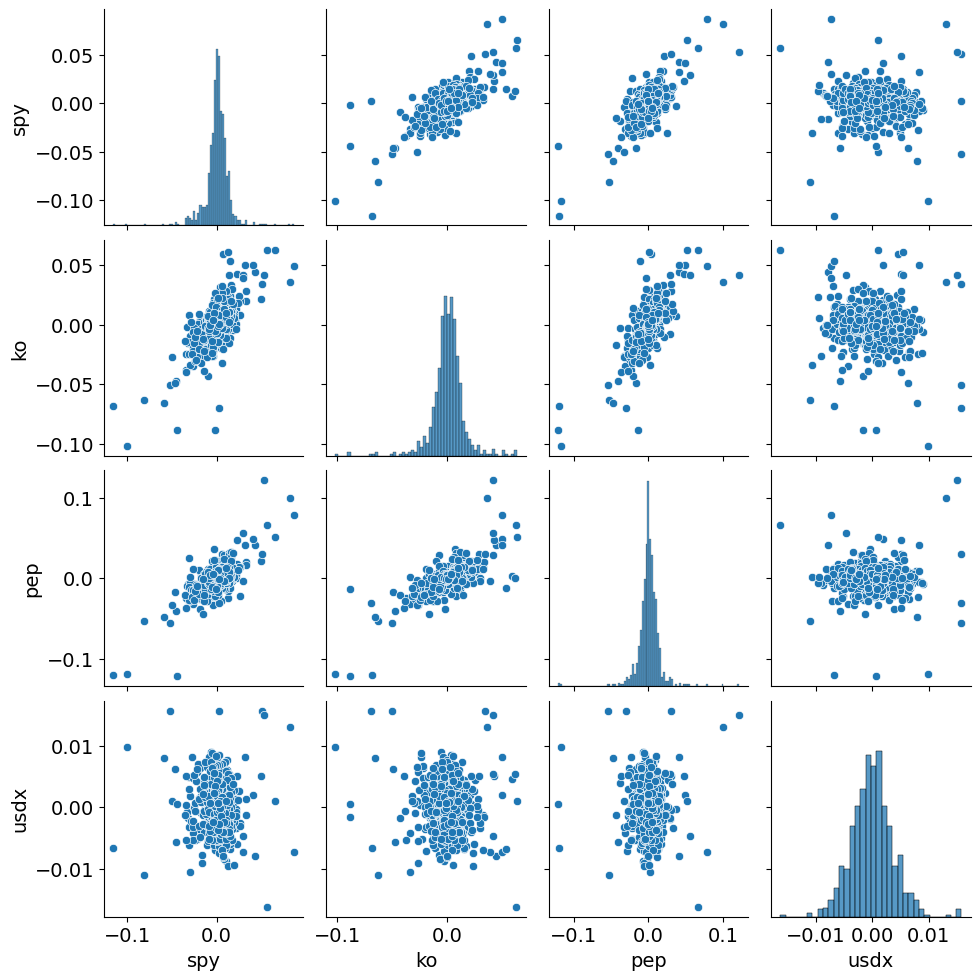

In [53]:
plt.figure(figsize=(20, 10))
sns.pairplot(df)
plt.show()

 Let's break down its components and interpretations:

   
**Interpretation**:
   - **Positive Linear Relationship**: If the dots form an upward-sloping pattern (from bottom-left to top-right), it suggests a positive linear relationship between the two variables. For instance, the scatter plot between `ko` and `spy` seems to indicate this kind of relationship, meaning that when SPY has higher returns, KO tends to as well.
   - **Negative Linear Relationship**: If the dots form a downward-sloping pattern, it suggests a negative linear relationship. It doesn't appear that any of the scatter plots strongly exhibit this pattern.
   - **No Relationship**: If the dots seem randomly scattered with no clear pattern, it suggests there's little to no linear relationship between the two variables. Some of the plots, like `usdx` vs. `pep`, seem closer to this behavior.
   - **Density and Concentration**: Areas with a higher concentration of dots indicate that many observations fall into that region. Sparse areas show less frequent combinations of the two variables' values.
   

Remember, while scatter plots can provide a visual indication of relationships, they only show correlations and do not indicate causation. Statistical analysis is needed to further validate and understand these relationships.

#### A scatter plot of X (spy) and Y (ko) to examine the nature of their relationship visually

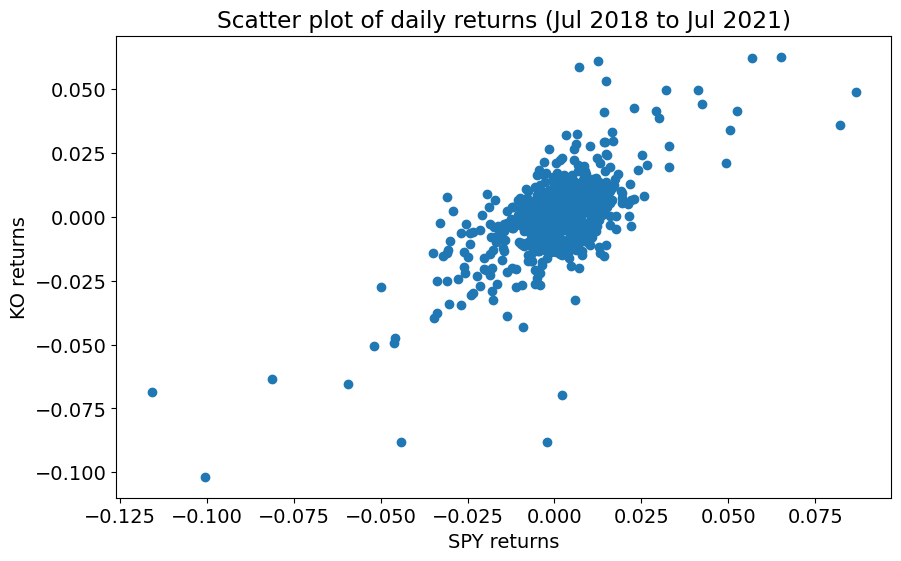

In [54]:
plt.figure(figsize = (10, 6))
plt.rcParams.update({'font.size': 14})
plt.xlabel("SPY returns")
plt.ylabel("KO returns")
plt.title("Scatter plot of daily returns (Jul 2018 to Jul 2021)")
plt.scatter(df['spy'], df['ko'])
plt.show()

#### Scatter Plot Explanation:
The scatter plot visually represents the daily returns of SPY (on the x-axis) against the daily returns of KO (on the y-axis) for the period July 2018 to July 2021. 

Key Observations:

1. Central Cluster: Most of the data points are clustered around the center, suggesting that on most days, the returns of both SPY and KO were close to zero. This is typical for daily returns of stocks and indices, which often see small fluctuations on a day-to-day basis.

2. General Relationship: The points appear to have a slight positive linear relationship. This implies that, in general, on days when SPY had positive returns, KO also tended to have positive returns, and vice versa.

3. Outliers: There are some days where either SPY or KO had significantly negative or positive returns, but the other did not. These outliers could be due to company-specific news or events that affected one but not the other.

In summary, it suggests that there is some degree of positive relationship between the daily returns of SPY and KO over the specified period. However, as always, it's essential to combine visual assessments with statistical analyses to make more concrete inferences.

#### A scatter plot of X (pep) and Y (ko) to examine the nature of their relationship visually

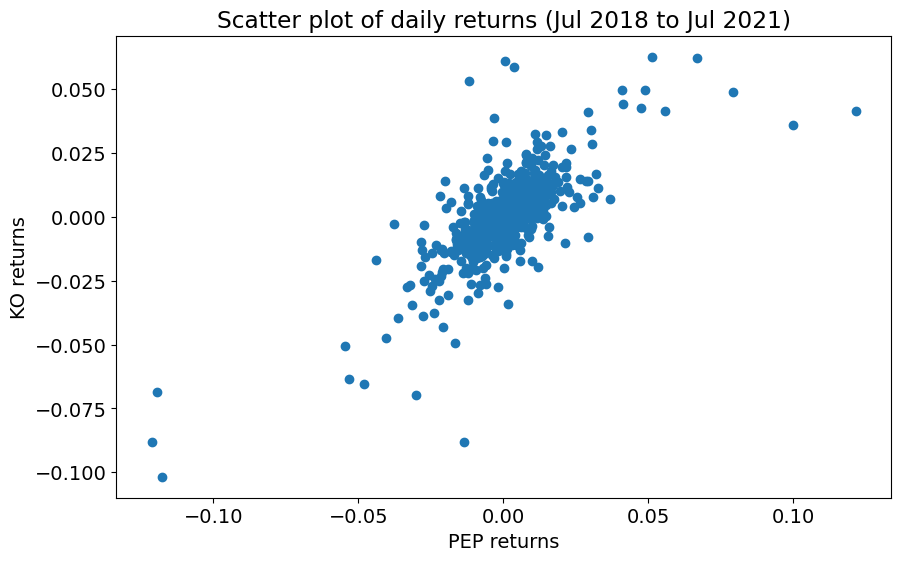

In [55]:
plt.figure(figsize = (10, 6))
plt.rcParams.update({'font.size': 14})
plt.xlabel("PEP returns")
plt.ylabel("KO returns")
plt.title("Scatter plot of daily returns (Jul 2018 to Jul 2021)")
plt.scatter(df['pep'], df['ko'])
plt.show()

#### Scatter Plot Explanation:
The provided scatter plot depicts the relationship between the daily returns of PEP (PepsiCo) on the x-axis and KO (Coca-Cola) on the y-axis from July 2018 to July 2021.

Key Observations:

1. Central Density: Most data points are densely clustered around the center, which means on most days, both PEP and KO had daily returns close to zero.

2. Positive Correlation: The general spread of the points suggests a positive correlation between PEP and KO returns. This means when PEP had positive returns, KO also tended to have positive returns and vice versa.

3. Outliers: Some points deviate significantly from the main cluster. These could represent days when specific events or news affected one of the companies more than the other.

4. Range: Both PEP and KO returns, for the most part, range between -0.05 and 0.05. Only on a few occasions did they exceed this range.

In essence, the scatter plot suggests that the daily returns of PEP and KO are positively correlated over this period. Given that both are major players in the beverage industry, it's conceivable they might react similarly to market factors.

#### A scatter plot of X (USDX) and Y (ko) to examine the nature of their relationship visually

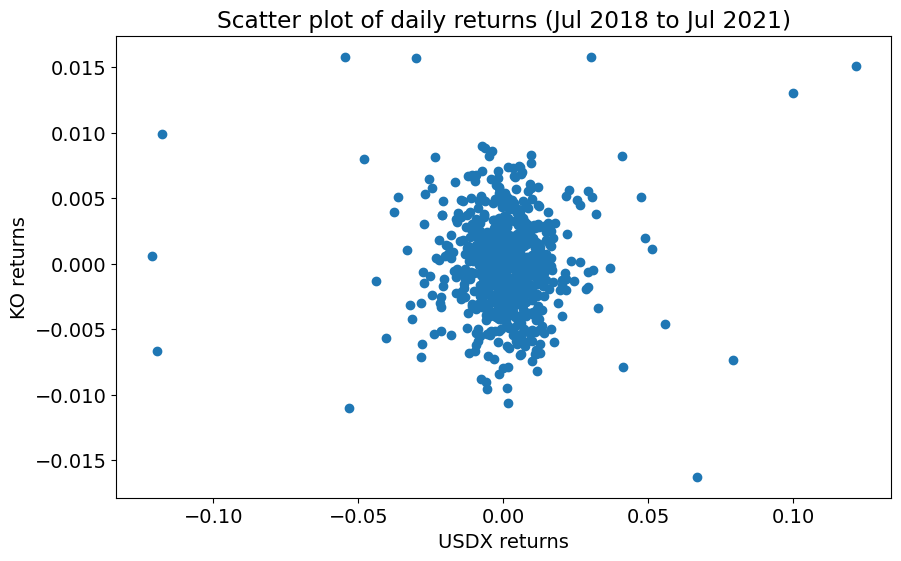

In [56]:
plt.figure(figsize = (10, 6))
plt.rcParams.update({'font.size': 14})
plt.xlabel("USDX returns")
plt.ylabel("KO returns")
plt.title("Scatter plot of daily returns (Jul 2018 to Jul 2021)")
plt.scatter(df['pep'], df['usdx'])
plt.show()

#### Scatter Plot Explanation:

The scatter plot shows the relationship between the daily returns of USDX (U.S. Dollar Index) on the x-axis and KO (Coca-Cola) on the y-axis from July 2018 to July 2021.

Key Observations:

1. Central Concentration: A significant number of data points are densely clustered around the center, indicating many days where both USDX and KO returns were close to zero.

2. Spread: The distribution of the points does not show a clear linear pattern, which means there isn't a strong linear correlation between USDX and KO returns.

3. Outliers: There are individual points that stand apart from the central cluster, indicating days when there were more extreme movements in either KO or USDX or both.

4. Range: Both USDX and KO returns mostly hover between -0.05 and 0.05, with only a few instances of more extreme values.

In summary, the scatter plot suggests that there isn't a strong linear relationship between the daily returns of USDX and KO over the period of July 2018 to July 2021. This might be expected since KO is a specific company in the beverage sector, and USDX represents the value of the U.S. dollar against a basket of other major currencies, so their price movements can be influenced by different factors.


Moreover, when examining the scatter plot of USDX returns against KO returns, if there were a strong positive linear correlation, we would expect to see most data points clustering or lining up in a pattern that moves from the bottom left to the top right of the plot. Conversely, if there were a strong negative linear correlation, the data points would line up in a pattern that moves from the top left to the bottom right.

In the provided scatter plot, the points are distributed in a more cloud-like pattern without a clear ascending or descending trend. This means that the returns of USDX for a given day don't predictably correspond to the returns of KO in a linear manner. Hence, there isn't a strong linear correlation between USDX and KO returns. There could be other non-linear relationships or factors at play that the scatter plot doesn't capture.

### Calculating the Correlation and plotting it on the heatmap

In [57]:
df_cor = df.corr()
df_cor

,spy,ko,pep,usdx
spy,1.000000,0.685608,0.727079,-0.038682
ko,0.685608,1.000000,0.739573,-0.097766
pep,0.727079,0.739573,1.000000,-0.005847
usdx,-0.038682,-0.097766,-0.005847,1.000000


### Heatmap for visualization

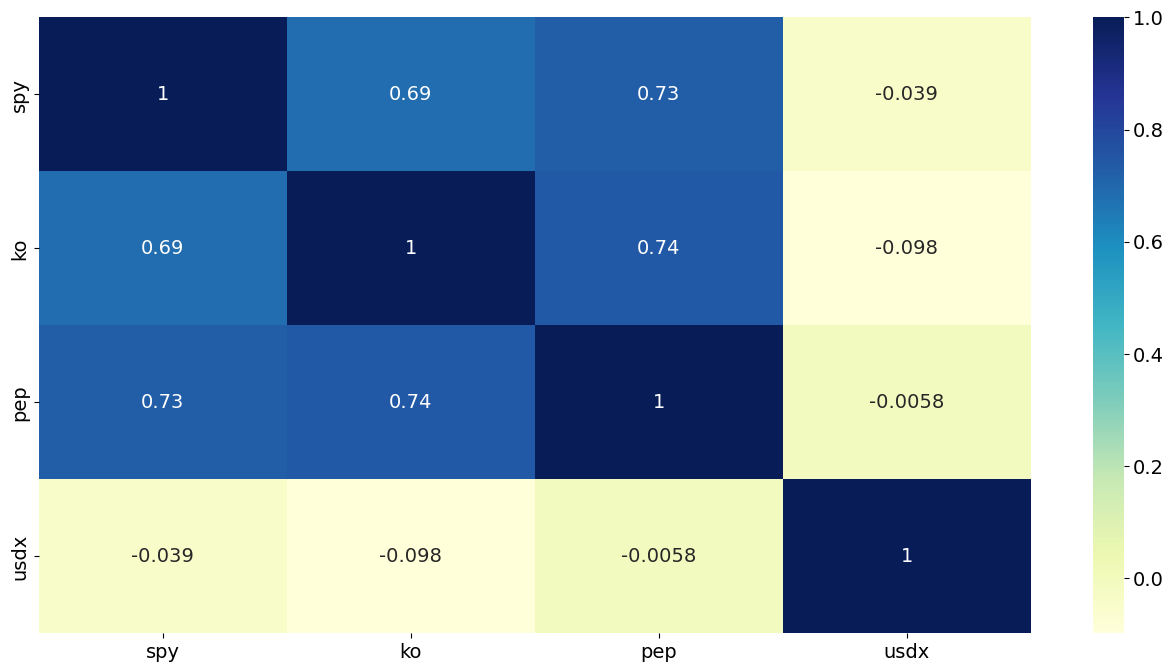

In [58]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(df_cor, cmap="YlGnBu", annot=True)
plt.show()

This heatmap visualizes the correlation coefficients between various assets: `spy`, `ko`, `pep`, and `usdx`. The values in the heatmap represent the Pearson correlation coefficient, which ranges between -1 and 1.

#### Color Scale:
Dark Blue: Strong positive correlation (values close to 1)
Light Blue/Green: Weak correlation, whether positive or negative
Dark Green: Strong negative correlation (values close to -1)

#### Interpretation:

1. KO and PEP (0.74) - They have a strong positive correlation, suggesting that when ko moves in a particular direction, pep is likely to do the same.

2. KO and SPY (0.69) - They have a positive correlation of 0.69, which means they tend to move in the same direction. When spy has positive returns, ko is also likely to have positive returns, and vice versa.

3. KO and USDX (-0.098) - They have a weak negative correlation. This implies that ko and usdx returns don't have a strong linear relationship, but there's a slight tendency for them to move in opposite directions.

4. PEP and SPY (0.73) - They have a positive correlation of 0.73, which is even stronger than the spy and ko relationship. This implies that the returns of spy and pep are even more closely aligned.

5. PEP and USDX (-0.0058) - This value is very close to zero, indicating a negligible correlation between pep and usdx. Their returns do not have a meaningful linear relationship.

6. SPY and USDX (-0.039) - This value is close to zero, indicating a very weak negative correlation. This means there's little to no linear relationship between spy and usdx returns.

7. Diagonal (1s) - The diagonal from the top left to the bottom right shows a perfect correlation of 1. This is because any asset will always have a perfect correlation with itself.

#### Key Takeaways:

- ko, spy, and pep all have strong positive correlations with each other. This suggests that these assets tend to move in the same direction most of the time.

- usdx does not show a strong linear correlation with any of the other assets. Its correlations are weak and close to zero, meaning its returns don't have a strong or consistent relationship with the returns of spy, ko, or pep.

### Checking for missing values


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2018-07-31 to 2021-07-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spy     753 non-null    float64
 1   ko      753 non-null    float64
 2   pep     753 non-null    float64
 3   usdx    753 non-null    float64
dtypes: float64(4)
memory usage: 29.4 KB


There are no missing values in the dataset

## Outlier Analysis

Let's check for any outliers

In [60]:
df.describe()

,spy,ko,pep,usdx
count,753.000000,753.000000,753.000000,753.000000
mean,0.000669,0.000413,0.000550,-0.000027
std,0.014302,0.015220,0.015597,0.003665
min,-0.115887,-0.101728,-0.121358,-0.016262
25%,-0.003718,-0.005403,-0.005238,-0.002364
50%,0.001157,0.000654,0.000683,-0.000104
75%,0.006854,0.007150,0.006698,0.002053
max,0.086731,0.062783,0.121656,0.015786


### Interpretations:

1. <b>Comparing Volatility:</b> By comparing the standard deviations (std), you can get an understanding of which asset or index is more volatile.
- Among the assets mentioned, the U.S. Dollar Index (DX) has the lowest volatility, making it the least risky in terms of daily return variability.
- Among the equities, PepsiCo (PEP) has the highest volatility, followed closely by Coca Cola (KO), and then by the broader market index SPY.

2. <b>Central Tendency:</b> The central tendency of a dataset refers to a value that attempts to describe a "center point" or "typical value" of the dataset. Common measures include the mean and median. For instance, if the mean and median (50%) are close, it indicates that the data is somewhat symmetrically distributed around the mean.
- SPY:
    - Mean: 0.000669
    - Interpretation: On average, the daily log returns for SPY have been approximately 0.0669%. This positive value suggests a general upward trend over the period under consideration.
    
- KO (Coca Cola):
    - Mean: 0.000413
    - Interpretation: Coca Cola (KO) has an average daily log return of about 0.0413%, which also indicates a general upward trend, albeit slightly less than SPY.
    
- PEP(PepsiCo):
    - Mean: 0.000550
    - Interpretation: PepsiCo (PEP) has an average daily log return of 0.0550%, suggesting a positive movement in the stock's price over the period.

- DX(U.S. Dollar Index):
    - Mean: -0.000027
    - Interpretation: The U.S. Dollar Index (DX) has a slightly negative average daily log return, indicating a slight decline in the value of the U.S. dollar relative to a basket of other currencies over the period.
    



3. <b>Outliers:</b> By comparing the min, max, and the interquartile range (difference between 75% and 25%), you can get a sense of potential outliers. Values significantly below Q1 or above Q3 might be considered outliers, especially if they are far from these bounds.

When examining outliers, it's common to use the Interquartile Range (IQR) method. The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1). Data points outside the range of [Q1 - 1.5IQR, Q3 + 1.5IQR] can be considered as potential outliers.



### Boxplot for SPY

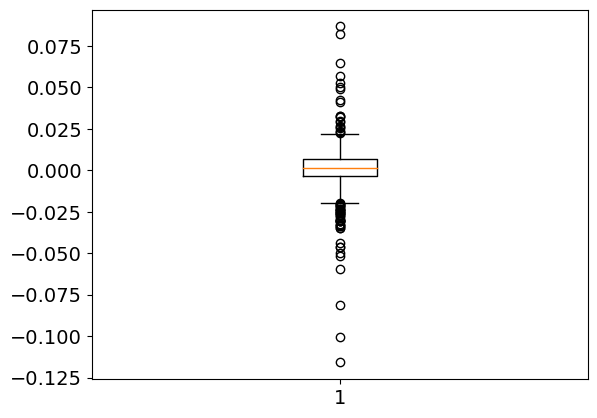

In [61]:
# Boxplot for SPY
plt.boxplot(df.spy)
Q1 = df.spy.quantile(0.25)
Q3 = df.spy.quantile(0.75)
IQR = Q3 - Q1
spy_boxplot = df[(df.spy >= Q1) & (df.spy <= Q3)]

From the given boxplot:

- The data has several outliers, both above and below the whiskers.
- The median (central line) is closer to the third quartile, indicating potential skewness in the data towards the lower end.

SPY (which typically refers to the SPDR S&P 500 ETF Trust, a fund that tracks the S&P 500 index), outliers in its daily returns can be influenced by a variety of factors related to the stock market and macroeconomic environment. Here are some potential reasons for outliers in the SPY returns:

1. Major Economic Announcements: Central bank decisions, job reports, GDP figures, and other significant economic indicators can cause large market movements.

2. Global events: Natural disasters, geopolitical tensions, or significant global events (like Brexit or a major international treaty) can influence the U.S. stock market.

3. Market Sentiment: Sometimes, market participants react emotionally to news or events, leading to sudden and large market movements. This can be due to factors like fear, uncertainty, or excessive optimism.

4. Earnings Reports: While SPY reflects the broader market, strong or weak earnings from major companies in the S&P 500 can have an outsized effect on the index.

5. Financial Crises: Events like the 2008 financial crisis or the dot-com bubble burst had significant impacts on the S&P 500.



### Boxplot for KO

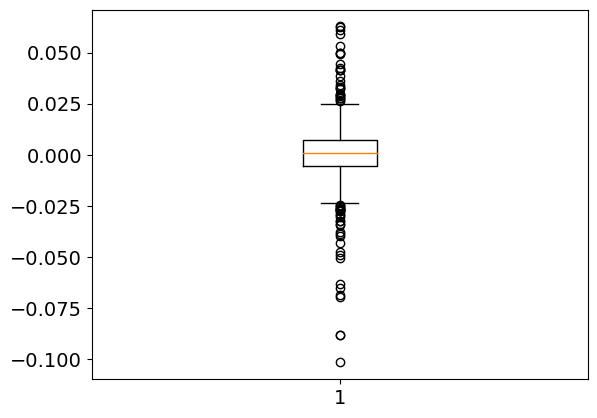

In [62]:

plt.boxplot(df.ko)
Q1 = df.ko.quantile(0.25)
Q3 = df.ko.quantile(0.75)
IQR = Q3 - Q1
ko = df[(df.ko >= Q1) & (df.ko <= Q3)]

<b>Outliers:</b>  These are the daily returns that fall outside the typical range. There are multiple outliers on both the positive and negative sides, indicating days when KO experienced unusually high or low returns compared to its usual performance.

<b>Potential Reasons for Outliers in KO Returns:</b>

KO typically refers to The Coca-Cola Company. The reasons for outliers in the returns of such a well-established company could include:

1. Earnings Announcements: Surprisingly positive or negative quarterly earnings results can lead to significant stock price movements.

2. Product Launches or Failures: News about successful product launches or, conversely, product recalls or failures can influence the stock price.

3. Regulatory or Legal Issues: Any news related to legal battles, regulatory challenges, or major fines can impact the stock.

4. Changes in Management: Announcements about key personnel – especially high-level executives – joining or leaving the company can move the stock.

5. Mergers and Acquisitions: News about mergers, acquisitions, or spin-offs can lead to significant stock price fluctuations.

6. Macroeconomic Factors: While specific to the company, KO's stock can still be influenced by broader economic trends or global events.

7. Market Sentiment: As with any stock, market sentiment, rumors, or news can lead to short-term volatility.

8. Competitor News: News or events related to major competitors can also influence KO's stock price.

### Boxplot for PEP

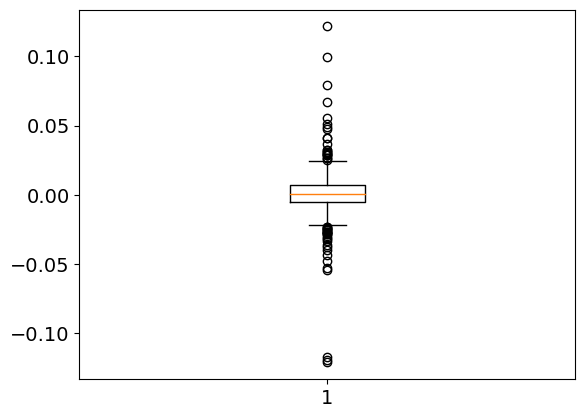

In [63]:

plt.boxplot(df.pep)
Q1 = df.pep.quantile(0.25)
Q3 = df.pep.quantile(0.75)
IQR = Q3 - Q1
ko = df[(df.pep >= Q1) & (df.pep <= Q3)]

### Boxplot for USDX

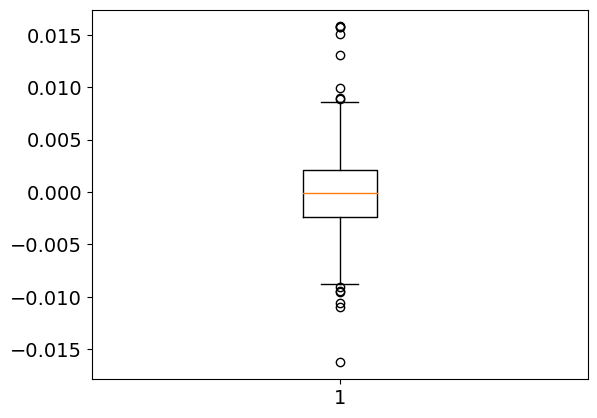

In [64]:

plt.boxplot(df.usdx)
Q1 = df.usdx.quantile(0.25)
Q3 = df.usdx.quantile(0.75)
IQR = Q3 - Q1
ko = df[(df.usdx >= Q1) & (df.usdx <= Q3)]

Outliers (the individual points outside the whiskers): There are a few outliers, more so on the positive side. These represent days where the USDX had significantly high or low returns compared to its typical performance.

<b>Potential Reasons for Outliers in USDX Returns:</b>

USDX (or DXY) typically refers to the U.S. Dollar Index, which measures the value of the U.S. dollar relative to a basket of foreign currencies. Here are potential reasons for the outliers in USDX returns:

1. Monetary Policy Announcements: Central bank decisions, such as changes in interest rates, or announcements related to quantitative easing can have a significant impact on the value of the U.S. dollar.

2. Economic Data Releases: Significant deviations expected economic data such as GDP growth, unemployment rate, inflation rate, can result in movements in the USDX.

3. Global Economic Events: Global crises, such as financial crises in other major economies, can result in flight to safety where investors move to preceived safe-haven assets, often benefitting the U.S dollar.

4. Trade Relations: Announcements related to trade relations, such as imposition of tariffs or trade deals, can influence the USDX.

5. Geopolitical Events: Events like wars, elections in major economies, or other geopolitical tensions can impact the value of the U.S. dollar.

6. Market Sentiment: Broad shifts in market sentiment, risk aversion, or risk-on behaviors can lead to flows in or out of the U.S. dollar.



## Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [65]:
df.head()

,spy,ko,pep,usdx
Date,,,,
2018-07-31,0.004917,0.008615,0.007156,0.001377
2018-08-01,-0.001672,-0.005160,-0.012161,0.001375
2018-08-02,0.005433,-0.004537,0.009461,0.005796
2018-08-03,0.004276,0.009483,0.013940,-0.000315
2018-08-06,0.003660,0.000643,0.009244,0.002310


In [66]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [67]:
df_train.shape

(527, 4)

In [68]:
df_test.shape

(226, 4)

#### Scaling
Now that we have done the test-train split, we need to scale the variables for better interpretability.

In [69]:
df.columns

Index(['spy', 'ko', 'pep', 'usdx'], dtype='object')

In [70]:
df_train.head()

,spy,ko,pep,usdx
Date,,,,
2020-11-27,0.002781,-0.004355,0.003048,-0.002176
2018-10-22,-0.004499,-0.007801,-0.008102,0.003130
2019-07-22,0.002453,-0.003313,0.001459,0.001132
2020-07-16,-0.003299,-0.005403,0.001420,0.002806
2021-07-19,-0.014878,-0.011951,-0.000128,0.002155


In [71]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['spy','ko','pep', 'usdx']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [72]:
df_train.head()

,spy,ko,pep,usdx
Date,,,,
2020-11-27,0.114723,-0.291719,0.170254,-0.586140
2018-10-22,-0.376129,-0.511551,-0.484635,0.863088
2019-07-22,0.092644,-0.225284,0.076974,0.317392
2020-07-16,-0.295201,-0.358570,0.074676,0.774754
2021-07-19,-1.075949,-0.776278,-0.016290,0.597001


As expected, the variables have been appropriately scaled.

#### Split the train dataset into X and y

In [73]:
y_train = df_train.pop('ko')
X_train = df_train

In [75]:
X_train.head()

,spy,pep,usdx
Date,,,
2020-11-27,0.114723,0.170254,-0.586140
2018-10-22,-0.376129,-0.484635,0.863088
2019-07-22,0.092644,0.076974,0.317392
2020-07-16,-0.295201,0.074676,0.774754
2021-07-19,-1.075949,-0.016290,0.597001


In [76]:
y_train.head()

Date
2020-11-27   -0.291719
2018-10-22   -0.511551
2019-07-22   -0.225284
2020-07-16   -0.358570
2021-07-19   -0.776278
Name: ko, dtype: float64

### Building the model

In [77]:
# Import statsmodel
import statsmodels.api as sm 

# Add a constant to the model
X_train = sm.add_constant(X_train)
X_train.head()


,const,spy,pep,usdx
Date,,,,
2020-11-27,1.0,0.114723,0.170254,-0.586140
2018-10-22,1.0,-0.376129,-0.484635,0.863088
2019-07-22,1.0,0.092644,0.076974,0.317392
2020-07-16,1.0,-0.295201,0.074676,0.774754
2021-07-19,1.0,-1.075949,-0.016290,0.597001


`X_train = sm.add_constant(X_train)` <br>
The add_constant function from the statsmodels library is used to prepend a column of ones to the X_train dataset. This column is usually referred to as the "intercept" or "constant" in the context of linear regression. The reason for adding this constant is that when modeling with ordinary least squares (OLS) regression, an intercept term is required to account for the mean of the dependent variable when all independent variables are set to zero. In other words, this constant allows the regression line to not necessarily pass through the origin (0,0).

In [78]:
# Fitting the model with the variables
lm1 = sm.OLS(y_train, X_train).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                     ko   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     265.9
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          8.85e-105
Time:                        21:49:05   Log-Likelihood:                -503.68
No. Observations:                 527   AIC:                             1015.
Df Residuals:                     523   BIC:                             1032.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.469e-17      0.028  -1.26e-15      1.0

The code fits an OLS regression model to predict "ko" using "spy", "pep", and "usdx" as predictors. 

- `R-squared:` Represents the proportion of the variance for the dependent variable that's explained by independent variables in the model. Here, it's 0.604, meaning about 60.4% of the variance in "ko" is explained by the model.

- `Adj. R-squared:` Adjusted R-squared adjusts for the number of predictors in the model. It's 0.602, very close to R-squared.

- `t-statistic value:` This is a measure of how many standard deviations our coefficient estimate is far from 0. High t-values can be an indication that the coefficient is statistically significant.

- `p-value:` A smaller p-value indicates that you can reject the null hypothesis (the variable doesn't have an effect). Here, p-values of "spy", "pep", and "usdx" are 0.000, suggesting they are statistically significant predictors.

- `Durbin-Watson:` Tests for homoscedasticity (equal variance) of the residuals. A value close to 2 suggests that there is no autocorrelation.

- `Jarque-Bera (JB):` Definition: The Jarque-Bera test is a goodness-of-fit test for normality. It tests whether the skewness and kurtosis of the data are consistent with a normal distribution. A large JB value indicates that the errors are not normally distributed. Given the JB value of 3561.671 and since the JB test statistic is significantly large, we can reject the null hypothesis that the residuals are normally distributed. This suggests that the residuals have significant departures from normality.

- `Skew:`Skewness measures the asymmetry of the distribution of residuals around its mean. A negative value means the distribution is skewed left (or negatively skewed), while a positive value indicates right (or positive) skewness. The negative skew of -0.633 indicates that the distribution of residuals has a leftward (or negative) skew. This means there might be more extreme negative residuals than positive ones.

- `Kurtosis:`Kurtosis measures the "tailedness" of the distribution of residuals. A kurtosis value greater than 3 (for a normally distributed data) indicates that the distribution has fatter tails and a sharper peak than the normal distribution. This is termed "leptokurtic". If it's less than 3, the distribution is "platykurtic", indicating thinner tails and a flatter peak. A kurtosis value of 15.673 is significantly greater than 3, indicating that the residuals have heavy tails. This suggests that there are more outliers than expected if the data were normally distributed. The presence of outliers can affect the efficiency of the OLS estimators.

- `Cond. No.`: The Condition Number (Cond. No.) is used to check for multicollinearity in the regression model. The condition number doesn't have a strict range like a probability value. It can range from 1 (indicating no multicollinearity) to infinity.A s a general rule of thumb, a condition number, near or below 10 suggests that multicollinearity is likely not problematic. Significantly above 10 (especially values in the 100s or 1000s) might be a cause for concern, indicating potential multicollinearity issues. A condition number of 2.58 is quite low, indicating that multicollinearity is likely not a significant concern for this model. This value suggests that the predictor variables are not too highly correlated with one another.

From the results:

- All the predictors (spy, pep, and usdx) seem to be statistically significant since their p-values are 0.000 (below 0.05).

- The coefficients indicate the direction and magnitude of the relationship between each predictor and the dependent variable. For instance, 'spy' and 'pep' have positive relationships with 'ko', while 'usdx' has a negative relationship.

Remember, while statistical significance indicates that there's evidence to suggest a relationship exists between variables, it doesn't imply causality.

#### Printing the parameter estimates of the muliple linear regression model

In [79]:
lm1 = lm1.params

print("\n")
print("====================================================================")
print("The intercept and slopes in the statsmodels regression model are")
print("\n")
print(lm1)
print("====================================================================")
print("\n")



The intercept and slopes in the statsmodels regression model are


const   -3.469447e-17
spy      2.584216e-01
pep      5.595195e-01
usdx    -1.195429e-01
dtype: float64




### Residual Analysis

Before we make predictions on the test set, let's first analyze the residuals.

In [82]:
# Initialize the model
lm1 = LinearRegression()

# Fit the model
lm1.fit(X_train, y_train)
y_train_ko = lm1.predict(X_train)

Here, `lm1.predict(X_train)` uses the lm1 regression model to generate predictions for the X_train data. The predicted values are stored in `y_train_ko.`

#### Plot the histogram of the error terms


Text(0.5, 0, 'Errors')

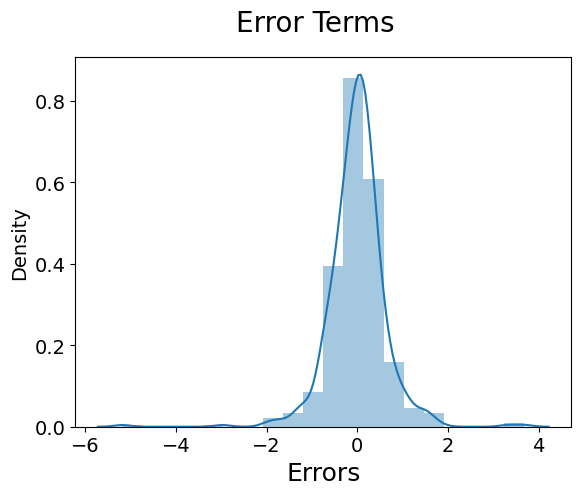

In [84]:
fig = plt.figure()
sns.distplot((y_train - y_train_ko), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Residuals are the differences between the observed and predicted values of the dependent variable. Analyzing the residuals can help diagnose potential issues with the regression model, such as non-linearity, non-constant variance, or non-normality.

The plotted image shows the distribution of the residuals (error terms). The main observations are:

- The residuals appear to be approximately normally distributed, centered around zero.
- The peak at the center suggests that most errors are small.
- There aren't obvious patterns of skewness or large tails, which is a good sign.

A key assumption in linear regression is that the errors (residuals) are normally distributed. The histogram of the error terms, as shown in the image, looks approximately bell-shaped and centered around zero. This suggests that this key assumption of linear regression is likely satisfied for the current model.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [86]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [87]:
df_test

,spy,ko,pep,usdx
Date,,,,
2021-04-21,0.562201,0.502150,0.500971,-0.231253
2019-01-07,0.456761,-0.850803,-0.515989,-1.358040
2020-03-06,-1.196696,-1.699970,-0.367092,-2.457028
2018-08-27,0.457486,0.069903,0.127278,-1.055841
2021-02-03,-0.019785,-0.261960,-0.161759,-0.231358
...,...,...,...,...
2019-08-13,0.967761,0.344797,0.709862,1.211699
2019-06-04,1.375127,0.011606,0.032229,-0.188574
2020-09-17,-0.668427,-0.316084,-0.788440,-0.695840


In [88]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('ko')
X_test = df_test

In [89]:
# Add a constant to the model
X_test = sm.add_constant(X_test)
X_test.head()

,const,spy,pep,usdx
Date,,,,
2021-04-21,1.0,0.562201,0.500971,-0.231253
2019-01-07,1.0,0.456761,-0.515989,-1.358040
2020-03-06,1.0,-1.196696,-0.367092,-2.457028
2018-08-27,1.0,0.457486,0.127278,-1.055841
2021-02-03,1.0,-0.019785,-0.161759,-0.231358


#### Making predictions

In [90]:

y_pred = lm1.predict(X_test)

Text(0, 0.5, 'y_pred')

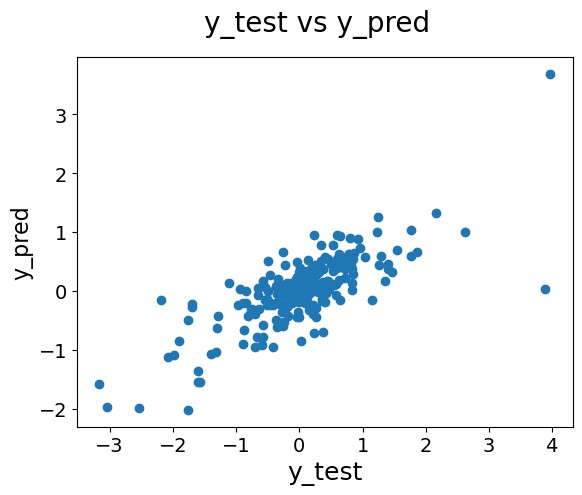

In [91]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

The scatter plot titled `y_test vs y_pred` visualizes the relationship between the true values from the test data (y_test) and the values predicted by the model `(y_pred).`

<b>Interpretation:</b>
- If every prediction was perfect, all points would lie along a 45-degree line (a line with a slope of 1) from the bottom left to the top right.
- The spread of points around this ideal line gives an indication of the model's accuracy.
- From the plot, it's evident that while there's a general trend of the model's predictions aligning with the actual values, there are some discrepancies. This means the model has a certain level of accuracy, but it's not perfect. The denser cluster around the center indicates that the model is more accurate for values closer to the mean, while predictions can deviate more as values move away from the mean.

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.575501112914445

In [93]:
n = len(y_test)
k = 3
adjusted_r2 = 1 - (1 - 0.5755005491616021) * (n - 1) / (n - k - 1)
print(adjusted_r2)

0.5697640700962183


Thus, for the model, the r-squared on training and test data is about 60.4% and 57.5% respectively. The adjusted r-squared on the train and test set is about 60.2% and 56.9%. There is no overfitting.

The other things that we could have done is doing outlier treatment and checked how the model would have performed. 